In [1]:
from JSON2YOLO.general_json2yolo import convert_coco_json
import os
os.chdir("/home/shared/Swifts.Research.Project")

In [2]:
#convert_coco_json(
#    "frame_labels_coco",  # directory with *.json
#    use_segments=True,
#    cls91to80=False,
#)

In [2]:
from pylabel import importer, exporter


In [7]:
import os 

#Specify path to the coco.json file
#split = 'train'
split = 'val'
path_to_annotations = f"frame_labels_coco/{split}.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = ".."

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="Swifts")
dataset.df.split = split
dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_iscrowd,ann_keypoints,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,..,Unlabeled-videos/Camera2/20230605_193537_tp000...,,1,1920,1080,,,456.521739,406.956522,...,0,,,,,2,Swift chick,Swift,val,1
1,..,Unlabeled-videos/Camera2/20230605_193537_tp000...,,1,1920,1080,,,664.347826,451.304348,...,0,,,,,1,Adult swift,Swift,val,1
2,..,Unlabeled-videos/Camera2/20230605_193537_tp000...,,1,1920,1080,,,414.782609,540.869565,...,0,,,,,2,Swift chick,Swift,val,1
3,..,Unlabeled-videos/Camera2/20230605_193537_tp000...,,1,1920,1080,,,389.565217,624.347826,...,0,,,,,0,Nest,Nest,val,1
4,..,Unlabeled-videos/Camera3/20230709_082252_tp000...,,2,1920,1080,,,747.872340,544.680851,...,0,,,,,1,Adult swift,Swift,val,1


In [8]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")

Number of images: 54
Number of classes: 6
Classes:['Nest', 'Adult swift', 'Swift chick', 'Fledgeling swift chick', 'Swift egg', 'Adult swift with filled crop']
Class counts:
cat_name
Nest                            158
Adult swift                     105
Fledgeling swift chick           85
Swift chick                      66
Swift egg                         6
Adult swift with filled crop      2
Name: count, dtype: int64
Path to annotations:
frame_labels_coco


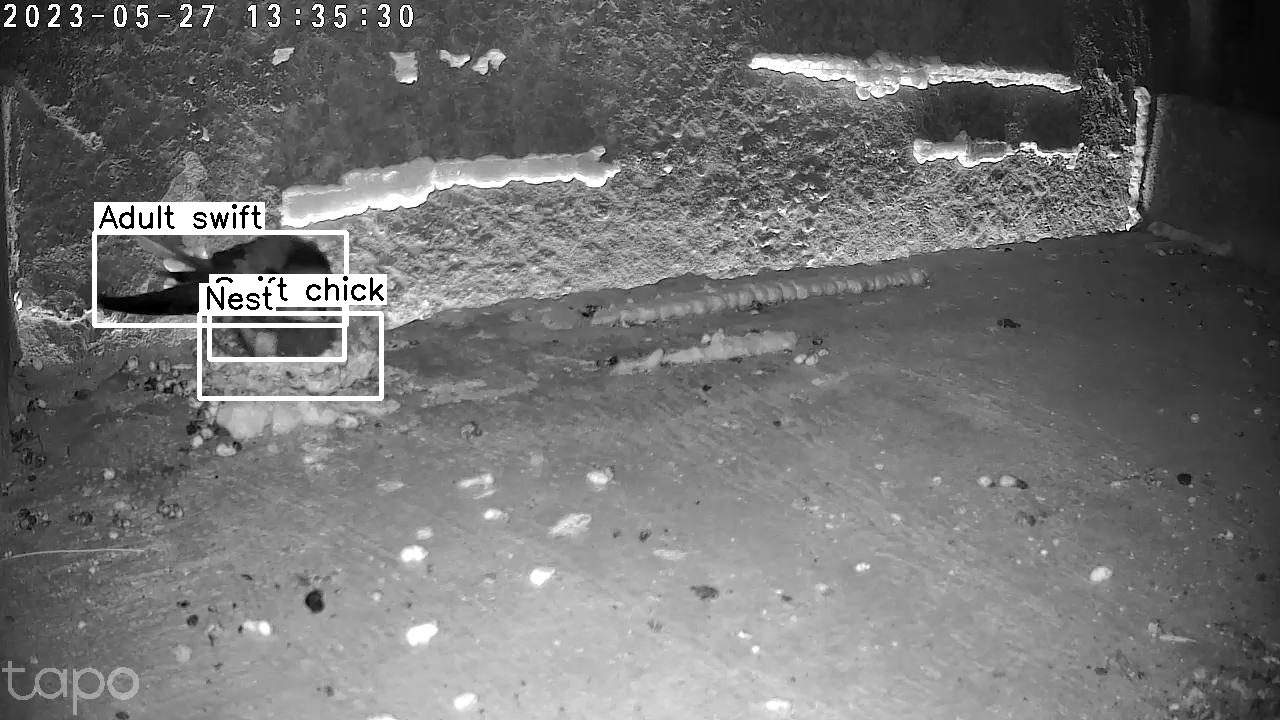

In [9]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(10))
#display(dataset.visualize.ShowBoundingBoxes("00000000.jpg"))

In [10]:
dataset.path_to_annotations = "/home/shared/Swifts.Research.Project/frame_labels_coco"
dataset.export.ExportToYoloV5(copy_images=True, output_path="/home/shared/Swifts.Research.Project/frame_labels_yolo/labels", segmentation=True, use_splits=True)

Exporting YOLO files...: 100%|██████████| 54/54 [00:08<00:00,  6.44it/s]


['/home/shared/Swifts.Research.Project/frame_labels_yolo/dataset.yaml',
 PosixPath('/home/shared/Swifts.Research.Project/frame_labels_yolo/labels/val/Unlabeled-videos/Camera2/20230605_193537_tp00017/Annotations/../00000305.txt'),
 PosixPath('/home/shared/Swifts.Research.Project/frame_labels_yolo/labels/val/Unlabeled-videos/Camera3/20230709_082252_tp00063/Annotations/../00000015.txt'),
 PosixPath('/home/shared/Swifts.Research.Project/frame_labels_yolo/labels/val/Unlabeled-videos/Camera1/Day/20230606_145859_tp00001/Annotations/../00001168.txt'),
 PosixPath('/home/shared/Swifts.Research.Project/frame_labels_yolo/labels/val/Unlabeled-videos/Camera1/Day/20230710_133146_tp00000/Annotations/../00000042.txt'),
 PosixPath('/home/shared/Swifts.Research.Project/frame_labels_yolo/labels/val/Unlabeled-videos/Camera3/20230606_070953_tp00053/Annotations/../00025826.txt'),
 PosixPath('/home/shared/Swifts.Research.Project/frame_labels_yolo/labels/val/Unlabeled-videos/Camera1/Day/20230710_133146_tp00000